# Data I/O

In [1]:
# load cars dataset to pandas dataframe from url
import pandas as pd

path = 'autos.pkl'
df = pd.read_pickle(path)
pd.set_option('display.max_columns', df.shape[1])
df.head()

symboling normalized-losses         make fuel-type aspiration  \
0          3               NaN  alfa-romero       gas        std   
1          3               NaN  alfa-romero       gas        std   
2          1               NaN  alfa-romero       gas        std   
3          2               164         audi       gas        std   
4          2               164         audi       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0             2  convertible          rwd           front        88.6   168.8   
1             2  convertible          rwd           front        88.6   168.8   
2             2    hatchback          rwd           front        94.5   171.2   
3             4        sedan          fwd           front        99.8   176.6   
4             4        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type  num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc                 4          130   
1   64.1    48.8         2548        dohc                 4          130   
2   65.5    52.4         2823        ohcv                 6          152   
3   66.2    54.3         2337         ohc                 4          109   
4   66.4    54.3         2824         ohc                 5          136   

  fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0        mpfi  3.47   2.68                9.0        111     5000        21   
1        mpfi  3.47   2.68                9.0        111     5000        21   
2        mpfi  2.68   3.47                9.0        154     5000        19   
3        mpfi  3.19   3.40               10.0        102     5500        24   
4        mpfi  3.19   3.40                8.0        115     5500        18   

   highway-mpg  price  
0           27  13495  
1           27  16500  
2           26  16500  
3           30  13950  
4           22  17450

# Understand the dataset

## Domain Knowledge

Check dataset's worksheet for how data set is shaped, what were the measurement types and units, what each column and categorical coding mean.
Check Wikipedia for the terminology.

symboling: ?

normalized-losses: ?

In [5]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [4]:
categorical_columns = [
    'symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
    'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'
]
for column in categorical_columns:
    df[column] = df[column].astype('category')

df[categorical_columns].describe()

symboling    make fuel-type aspiration  num-of-doors body-style  \
count         203     203       203        203           203        203   
unique          6      22         2          2             2          5   
top             0  toyota       gas        std             4      sedan   
freq           66      32       184        167           114         94   

       drive-wheels engine-location engine-type fuel-system  
count           203             203         203         203  
unique            3               2           7           8  
top             fwd           front         ohc        mpfi  
freq            118             200         146          93

In [6]:
df['aspiration'].value_counts()

std      167
turbo     36
Name: aspiration, dtype: int64

In [55]:
df.dtypes

symboling            category
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type          category
num-of-cylinders        int64
engine-size             int64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

In [16]:
df['symboling'] = df['symboling'].cat.set_categories([-3, -2, -1, 0, 1, 2, 3], ordered=True)

## Visualise the columns

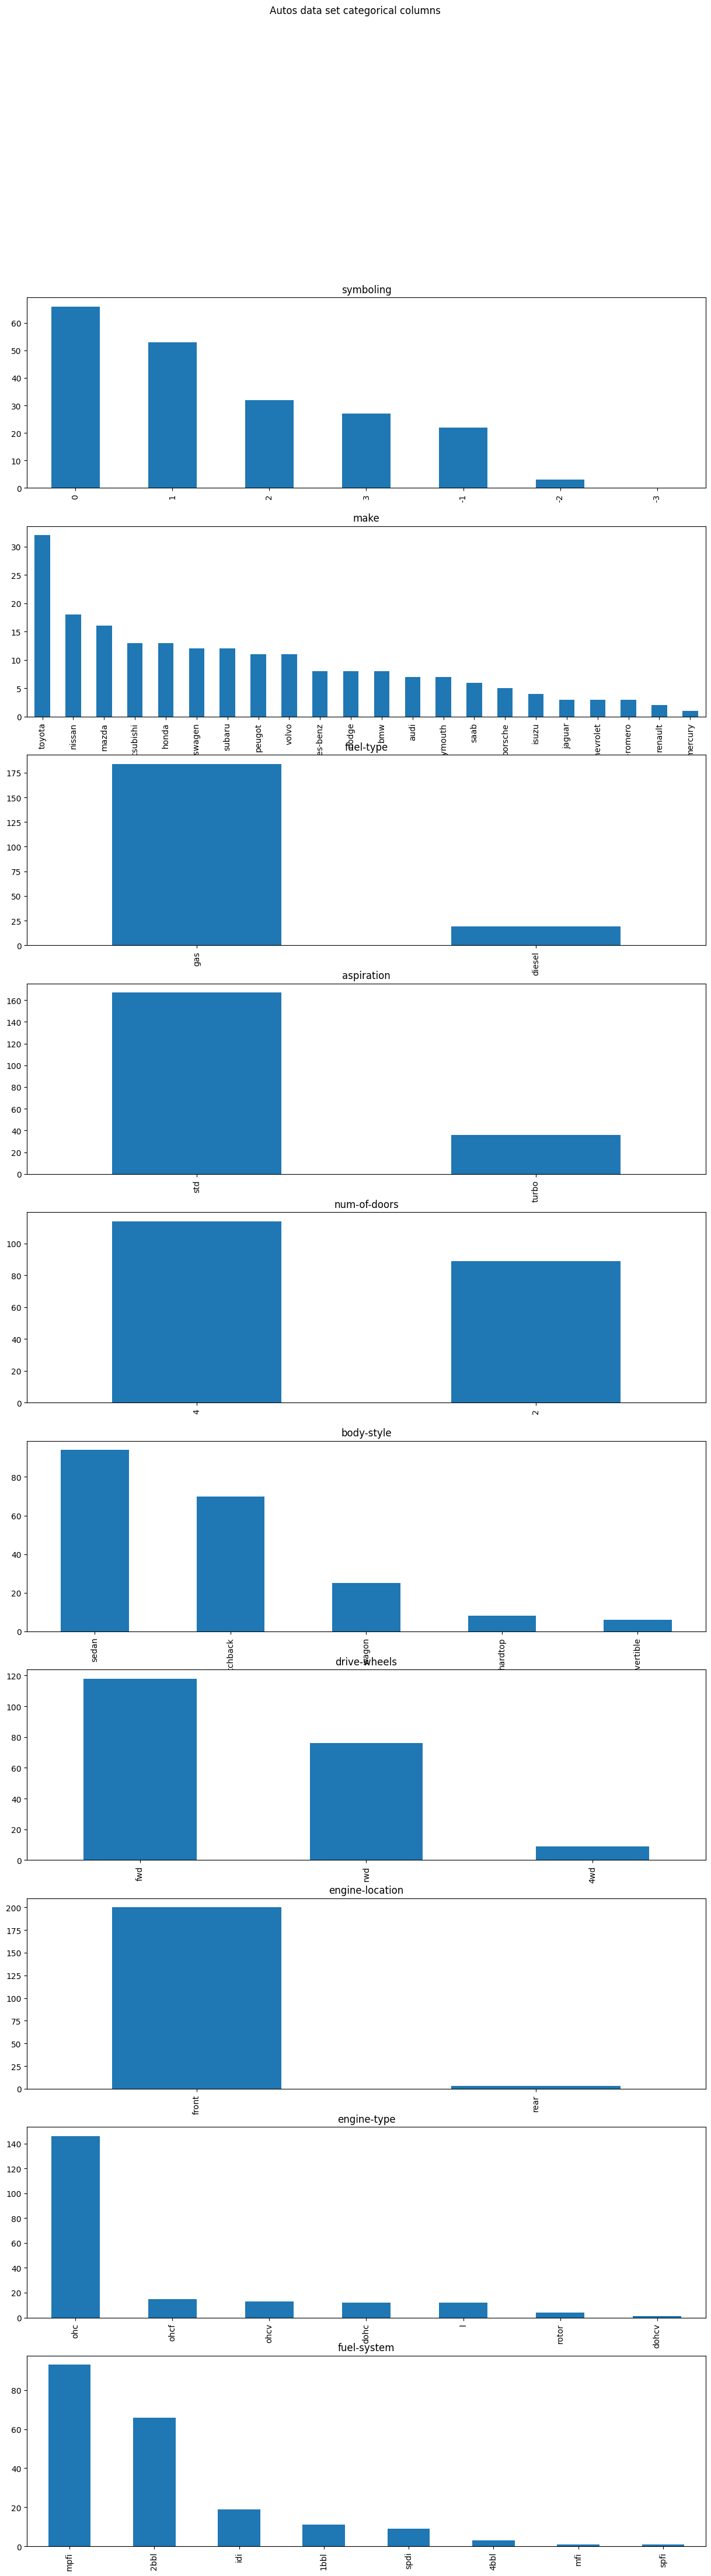

In [17]:
import matplotlib.pyplot as plt
num_charts = (df.dtypes == 'category').sum()
fig, axes = plt.subplots(num_charts, 1, figsize=(15, 5*num_charts), sharey=False)
fig.suptitle('Autos data set categorical columns')

for ix, column in enumerate(df.select_dtypes('category')):
    df[column].value_counts().plot(kind='bar', title=column, ax=axes[ix])


In [18]:
df.select_dtypes('number')

wheel-base  length  width  height  curb-weight  num-of-cylinders  \
0          88.6   168.8   64.1    48.8         2548                 4   
1          88.6   168.8   64.1    48.8         2548                 4   
2          94.5   171.2   65.5    52.4         2823                 6   
3          99.8   176.6   66.2    54.3         2337                 4   
4          99.4   176.6   66.4    54.3         2824                 5   
..          ...     ...    ...     ...          ...               ...   
200       109.1   188.8   68.9    55.5         2952                 4   
201       109.1   188.8   68.8    55.5         3049                 4   
202       109.1   188.8   68.9    55.5         3012                 6   
203       109.1   188.8   68.9    55.5         3217                 6   
204       109.1   188.8   68.9    55.5         3062                 4   

     engine-size  compression-ratio  city-mpg  highway-mpg  
0            130                9.0        21           27  
1            130                9.0        21           27  
2            152                9.0        19           26  
3            109               10.0        24           30  
4            136                8.0        18           22  
..           ...                ...       ...          ...  
200          141                9.5        23           28  
201          141                8.7        19           25  
202          173                8.8        18           23  
203          145               23.0        26           27  
204          141                9.5        19           25  

[203 rows x 10 columns]

In [59]:
df.select_dtypes('number').rank(pct=True)

normalized-losses  wheel-base    length     width    height  curb-weight  \
0                  NaN    0.022167  0.307882  0.253695  0.012315     0.578818   
1                  NaN    0.022167  0.307882  0.253695  0.012315     0.578818   
2                  NaN    0.236453  0.399015  0.509852  0.300493     0.704433   
3             0.898773    0.687192  0.647783  0.596059  0.559113     0.406404   
4             0.898773    0.674877  0.647783  0.630542  0.559113     0.709360   
..                 ...         ...       ...       ...       ...          ...   
198           0.288344    0.926108  0.876847  0.913793  0.736453     0.753695   
199           0.288344    0.926108  0.876847  0.901478  0.736453     0.802956   
200           0.288344    0.926108  0.876847  0.913793  0.736453     0.773399   
201           0.288344    0.926108  0.876847  0.913793  0.736453     0.891626   
202           0.288344    0.926108  0.876847  0.913793  0.736453     0.822660   

     num-of-cylinders  engine-size      bore    stroke  compression-ratio  \
0            0.413793     0.642857  0.670854  0.082915           0.445813   
1            0.413793     0.642857  0.670854  0.082915           0.445813   
2            0.913793     0.805419  0.010050  0.816583           0.445813   
3            0.413793     0.411330  0.384422  0.685930           0.891626   
4            0.827586     0.694581  0.384422  0.685930           0.110837   
..                ...          ...       ...       ...                ...   
198          0.413793     0.733990  0.962312  0.314070           0.827586   
199          0.413793     0.733990  0.962312  0.314070           0.295567   
200          0.913793     0.881773  0.731156  0.105528           0.325123   
201          0.913793     0.753695  0.130653  0.685930           0.990148   
202          0.413793     0.733990  0.962312  0.314070           0.827586   

     horsepower  peak-rpm  city-mpg  highway-mpg     price  
0      0.654229  0.407960  0.307882     0.325123  0.643216  
1      0.654229  0.407960  0.307882     0.325123  0.746231  
2      0.860697  0.407960  0.206897     0.305419  0.746231  
3      0.589552  0.798507  0.458128     0.487685  0.673367  
4      0.706468  0.798507  0.133005     0.066502  0.804020  
..          ...       ...       ...          ...       ...  
198    0.689055  0.676617  0.376847     0.369458  0.778894  
199    0.898010  0.641791  0.206897     0.251232  0.869347  
200    0.796020  0.798507  0.133005     0.103448  0.889447  
201    0.601990  0.246269  0.578818     0.325123  0.899497  
202    0.689055  0.676617  0.206897     0.251232  0.904523  

[203 rows x 16 columns]

In [ ]:
# def f(x):
#     return x / x.abs().max()

# df.select_dtypes('number').apply(f, axis=0)

In [26]:
df.select_dtypes('number').apply(lambda x: x / x.abs().max(), axis=0).apply(max)

wheel-base           1.0
length               1.0
width                1.0
height               1.0
curb-weight          1.0
num-of-cylinders     1.0
engine-size          1.0
compression-ratio    1.0
city-mpg             1.0
highway-mpg          1.0
dtype: float64

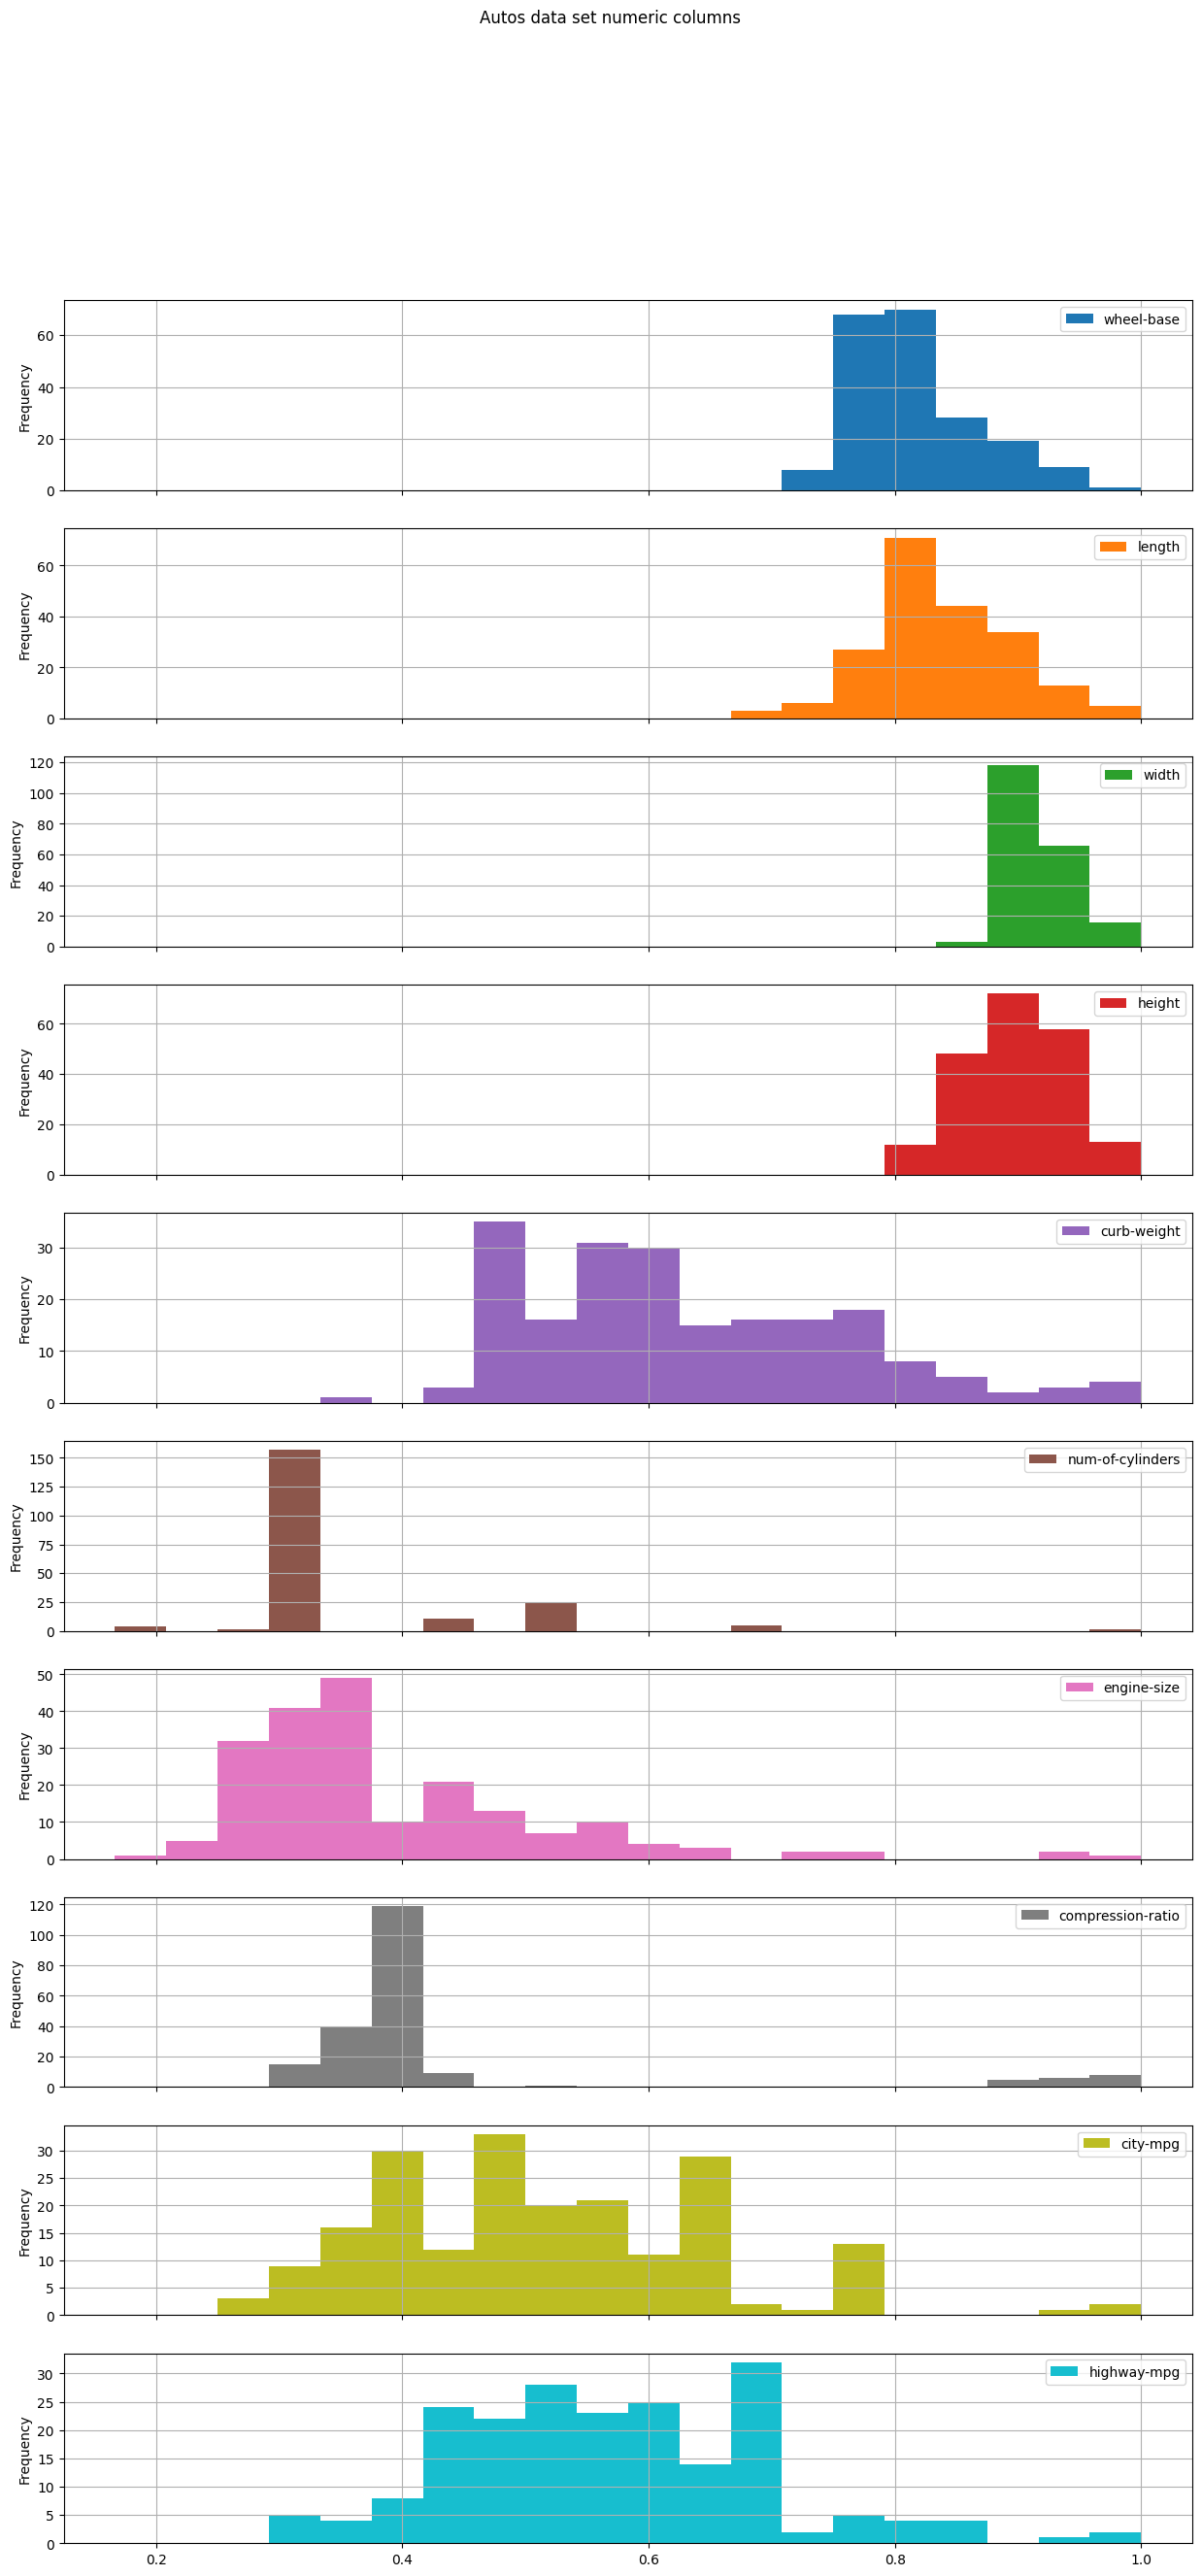

In [28]:
(
    df
    .select_dtypes('number')
    # .rank(pct=True)
    .apply(lambda x: x / x.abs().max(), axis=0)
    .plot(
        kind='hist', bins=20, subplots=True, grid=True, title="Autos data set numeric columns",
        sharex= True, sharey=False, legend=True,
        figsize=(15, 30)
    )
)

for ax in plt.gcf().axes:
    ax.legend(loc=1)

In [65]:
df.select_dtypes('number').apply(lambda x: (x - x.mean()) / x.std(), axis=0)

normalized-losses  wheel-base    length     width    height  curb-weight  \
0                  NaN   -1.685365 -0.430607 -0.844205 -2.019028    -0.018976   
1                  NaN   -1.685365 -0.430607 -0.844205 -2.019028    -0.018976   
2                  NaN   -0.708705 -0.236103 -0.193125 -0.545144     0.507282   
3             1.187850    0.168634  0.201530  0.132415  0.232740    -0.422760   
4             1.187850    0.102420  0.201530  0.225427  0.232740     0.509196   
..                 ...         ...       ...       ...       ...          ...   
198          -0.756234    1.708116  1.190258  1.388069  0.724035     0.754145   
199          -0.756234    1.708116  1.190258  1.341564  0.724035     0.939771   
200          -0.756234    1.708116  1.190258  1.388069  0.724035     0.868965   
201          -0.756234    1.708116  1.190258  1.388069  0.724035     1.261267   
202          -0.756234    1.708116  1.190258  1.388069  0.724035     0.964648   

     num-of-cylinders  engine-size      bore    stroke  compression-ratio  \
0           -0.353964     0.070007  0.507364 -1.805124          -0.281158   
1           -0.353964     0.070007  0.507364 -1.805124          -0.281158   
2            1.488463     0.596359 -2.375278  0.678976          -0.281158   
3           -0.353964    -0.432420 -0.514332  0.458866          -0.023970   
4            0.567250     0.213558 -0.514332  0.458866          -0.538345   
..                ...          ...       ...       ...                ...   
198         -0.353964     0.333183  1.638528 -0.327242          -0.152564   
199         -0.353964     0.333183  1.638528 -0.327242          -0.358314   
200          1.488463     1.098786  0.908745 -1.207682          -0.332595   
201          1.488463     0.428884 -1.171137  0.458866           3.319465   
202         -0.353964     0.333183  1.638528 -0.327242          -0.152564   

     horsepower  peak-rpm  city-mpg  highway-mpg     price  
0      0.164088 -0.262329 -0.638979    -0.538138  0.031634  
1      0.164088 -0.262329 -0.638979    -0.538138  0.408279  
2      1.244221 -0.262329 -0.945267    -0.683600  0.408279  
3     -0.061986  0.779728 -0.179548    -0.101752  0.088663  
4      0.264566  0.779728 -1.098410    -1.265448  0.527351  
..          ...       ...       ...          ...       ...  
198    0.239446  0.571317 -0.332692    -0.392676  0.451521  
199    1.394937  0.362905 -0.945267    -0.829062  0.727267  
200    0.741834  0.779728 -1.098410    -1.119986  1.033095  
201    0.038491 -0.679152  0.126740    -0.538138  1.156554  
202    0.239446  0.571317 -0.945267    -0.829062  1.175982  

[203 rows x 16 columns]

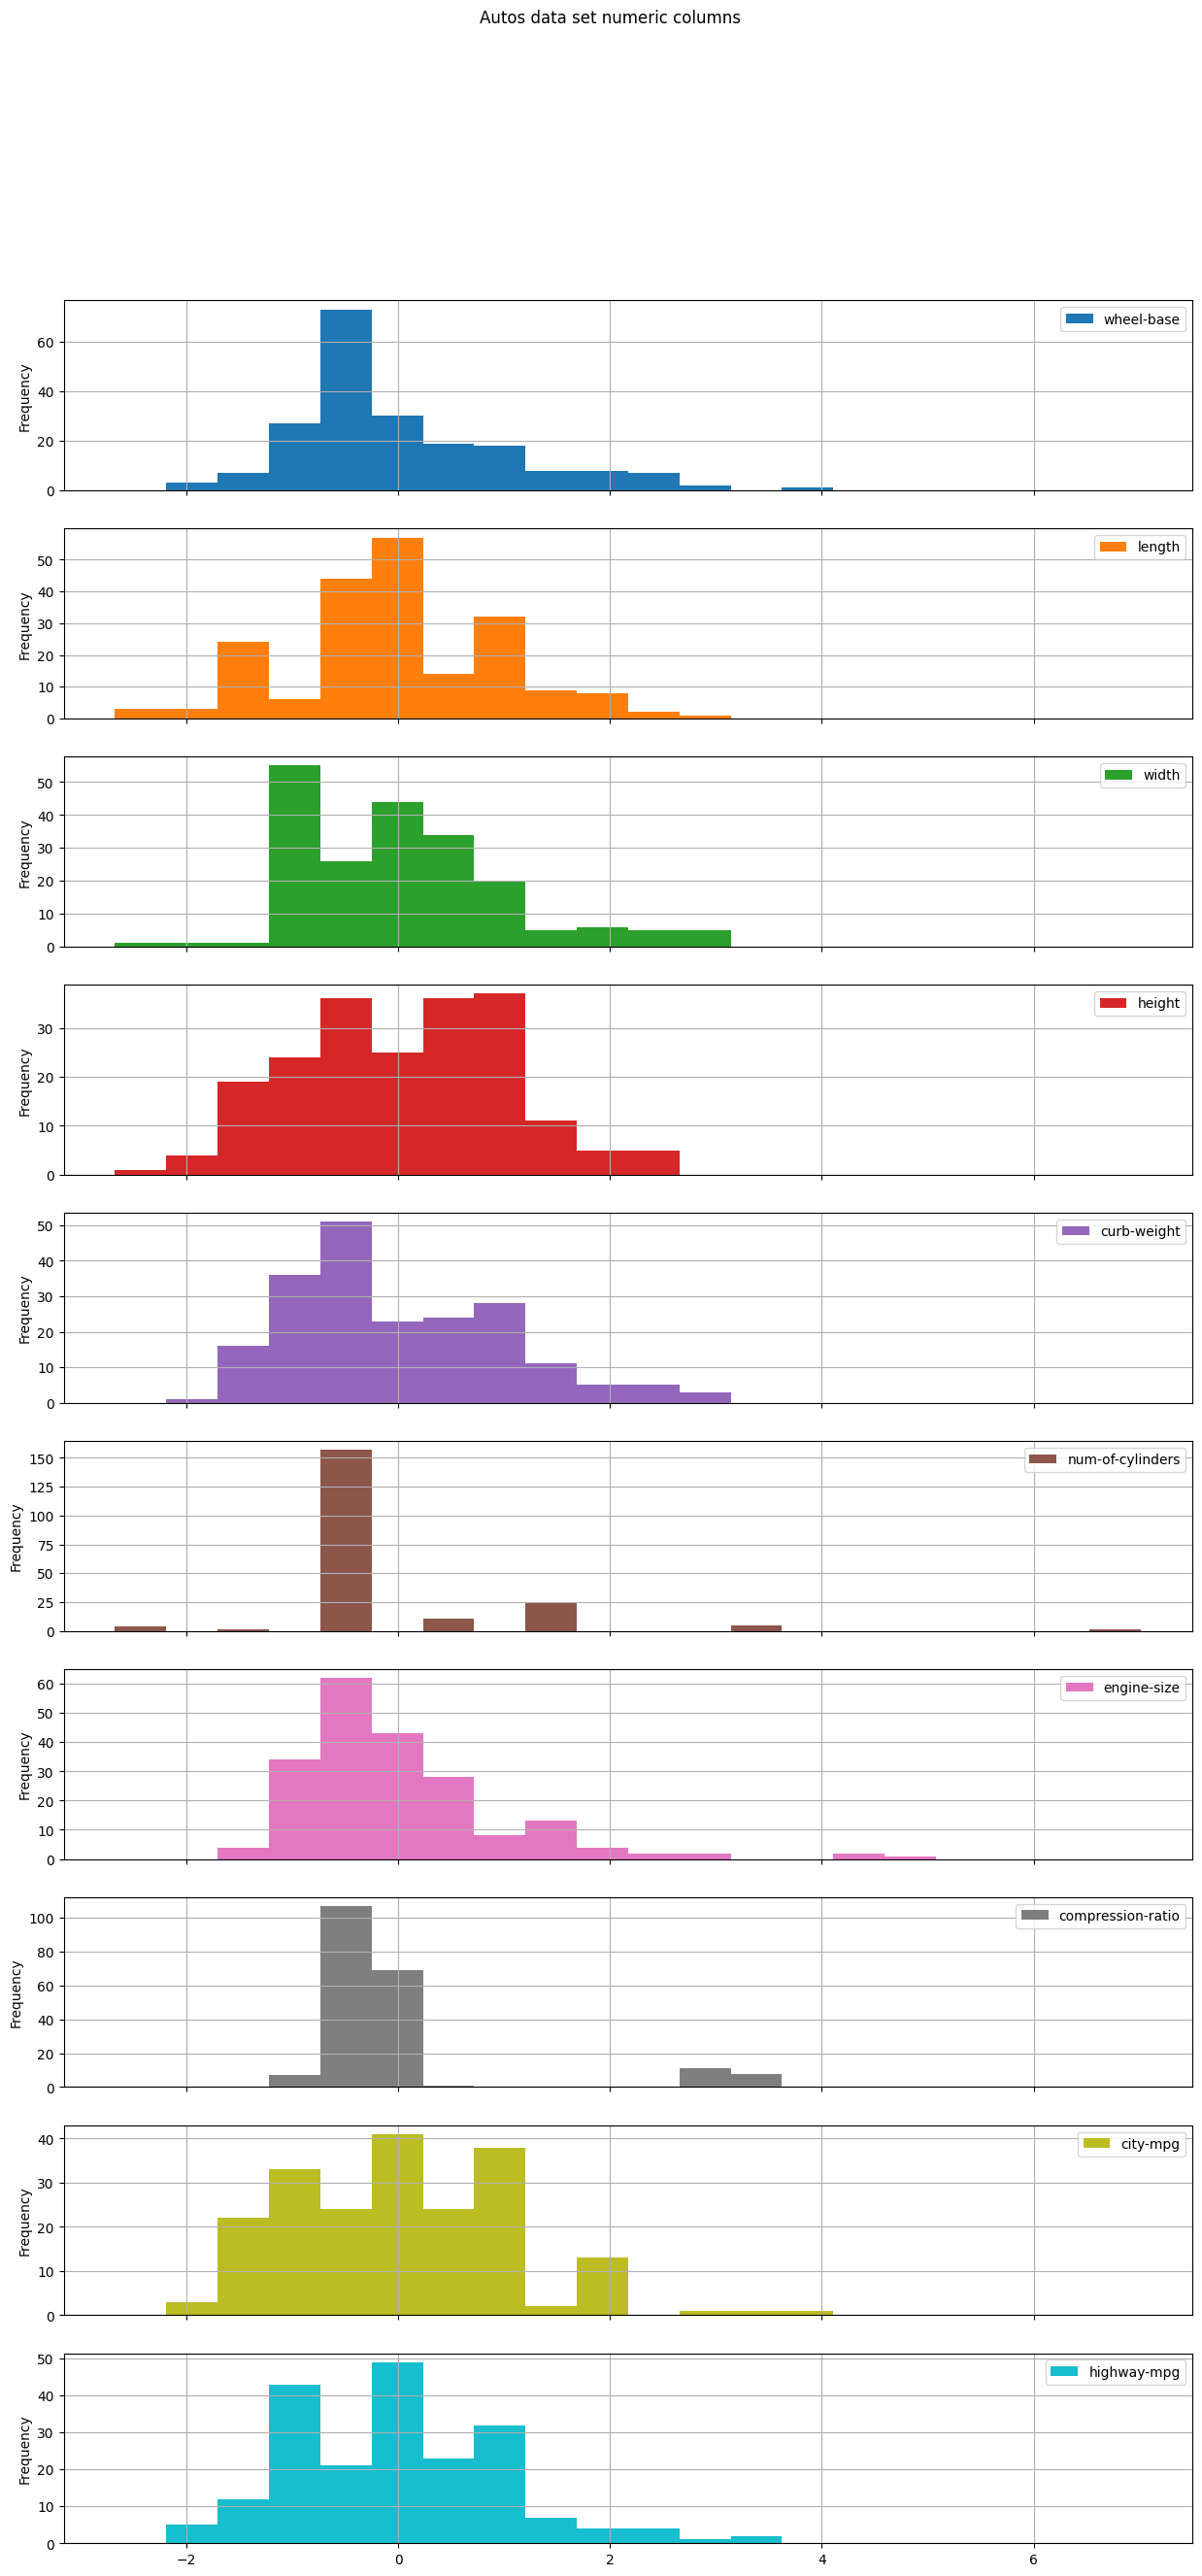

In [29]:
(
    df
    .select_dtypes('number')
    # .rank(pct=True)
    .apply(lambda x: (x - x.mean()) / x.std(), axis=0)
    .plot(
        kind='hist', bins=20, subplots=True, grid=True, title="Autos data set numeric columns",
        sharex= True, sharey=False, legend=True,
        figsize=(15, 30)
    )
)

for ax in plt.gcf().axes:
    ax.legend(loc=1)

## Plot correlation matrix

In [68]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


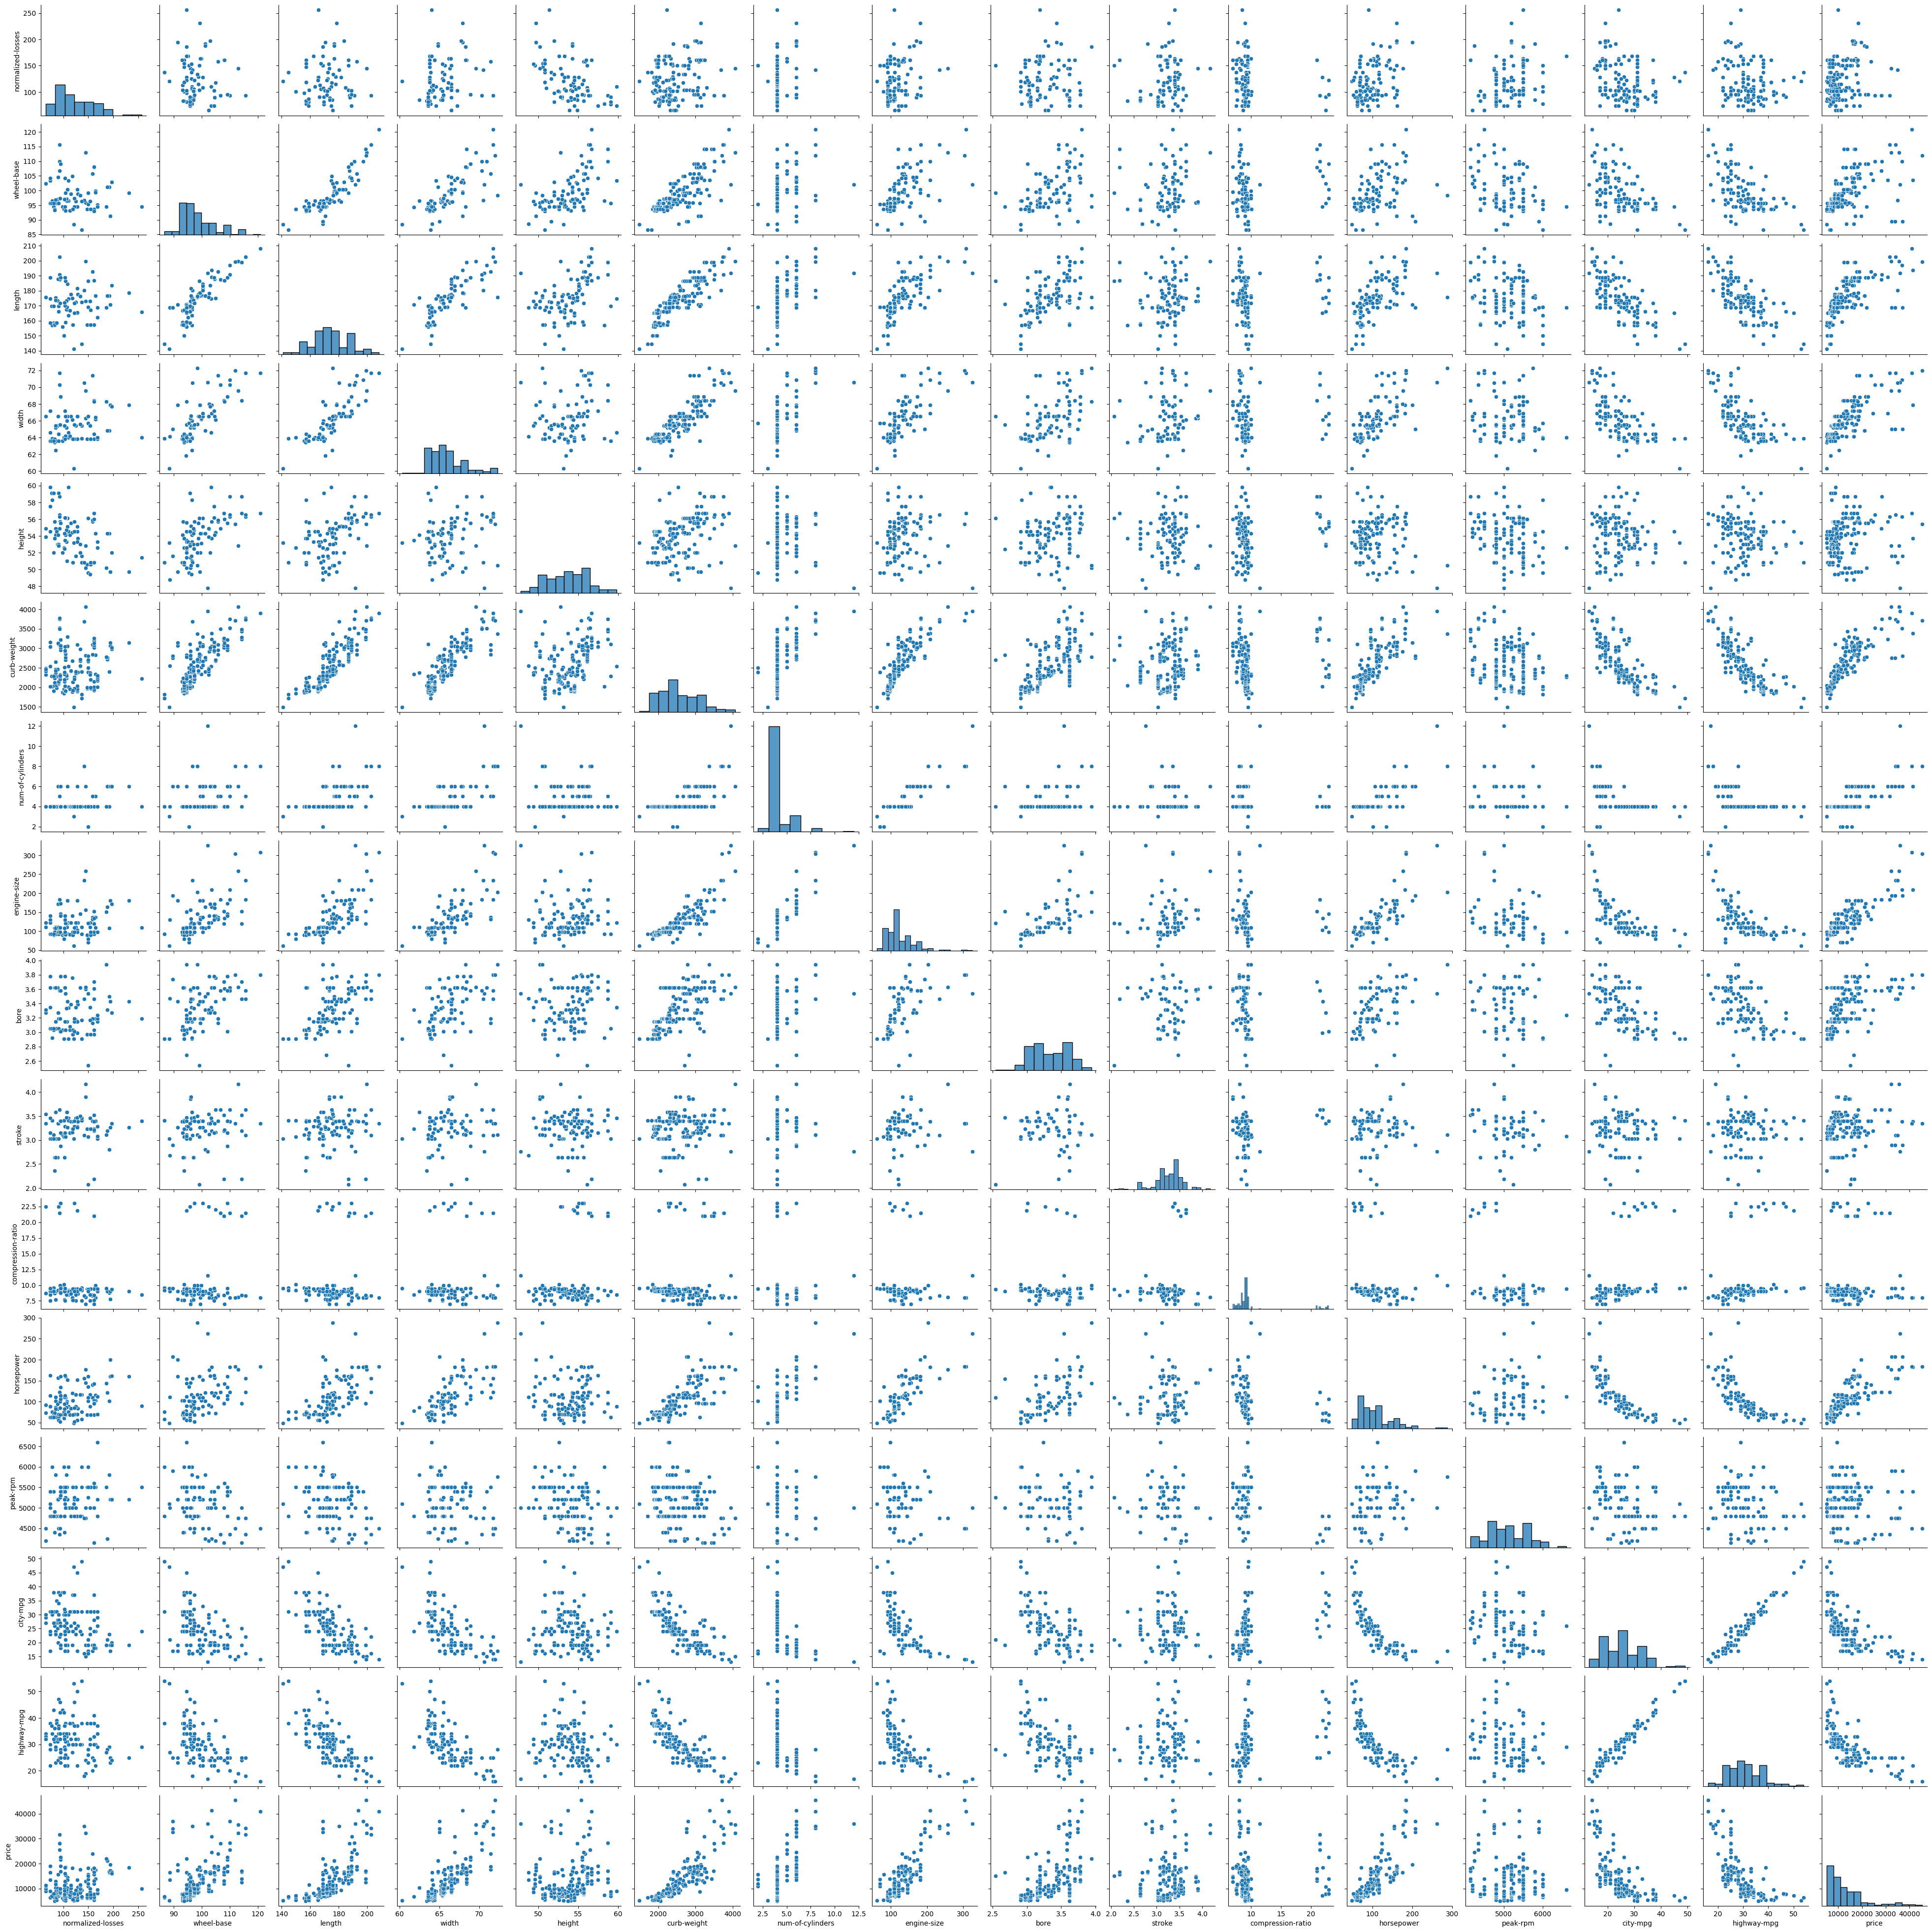

In [73]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Basic correlogram
sns.pairplot(df)
plt.show()

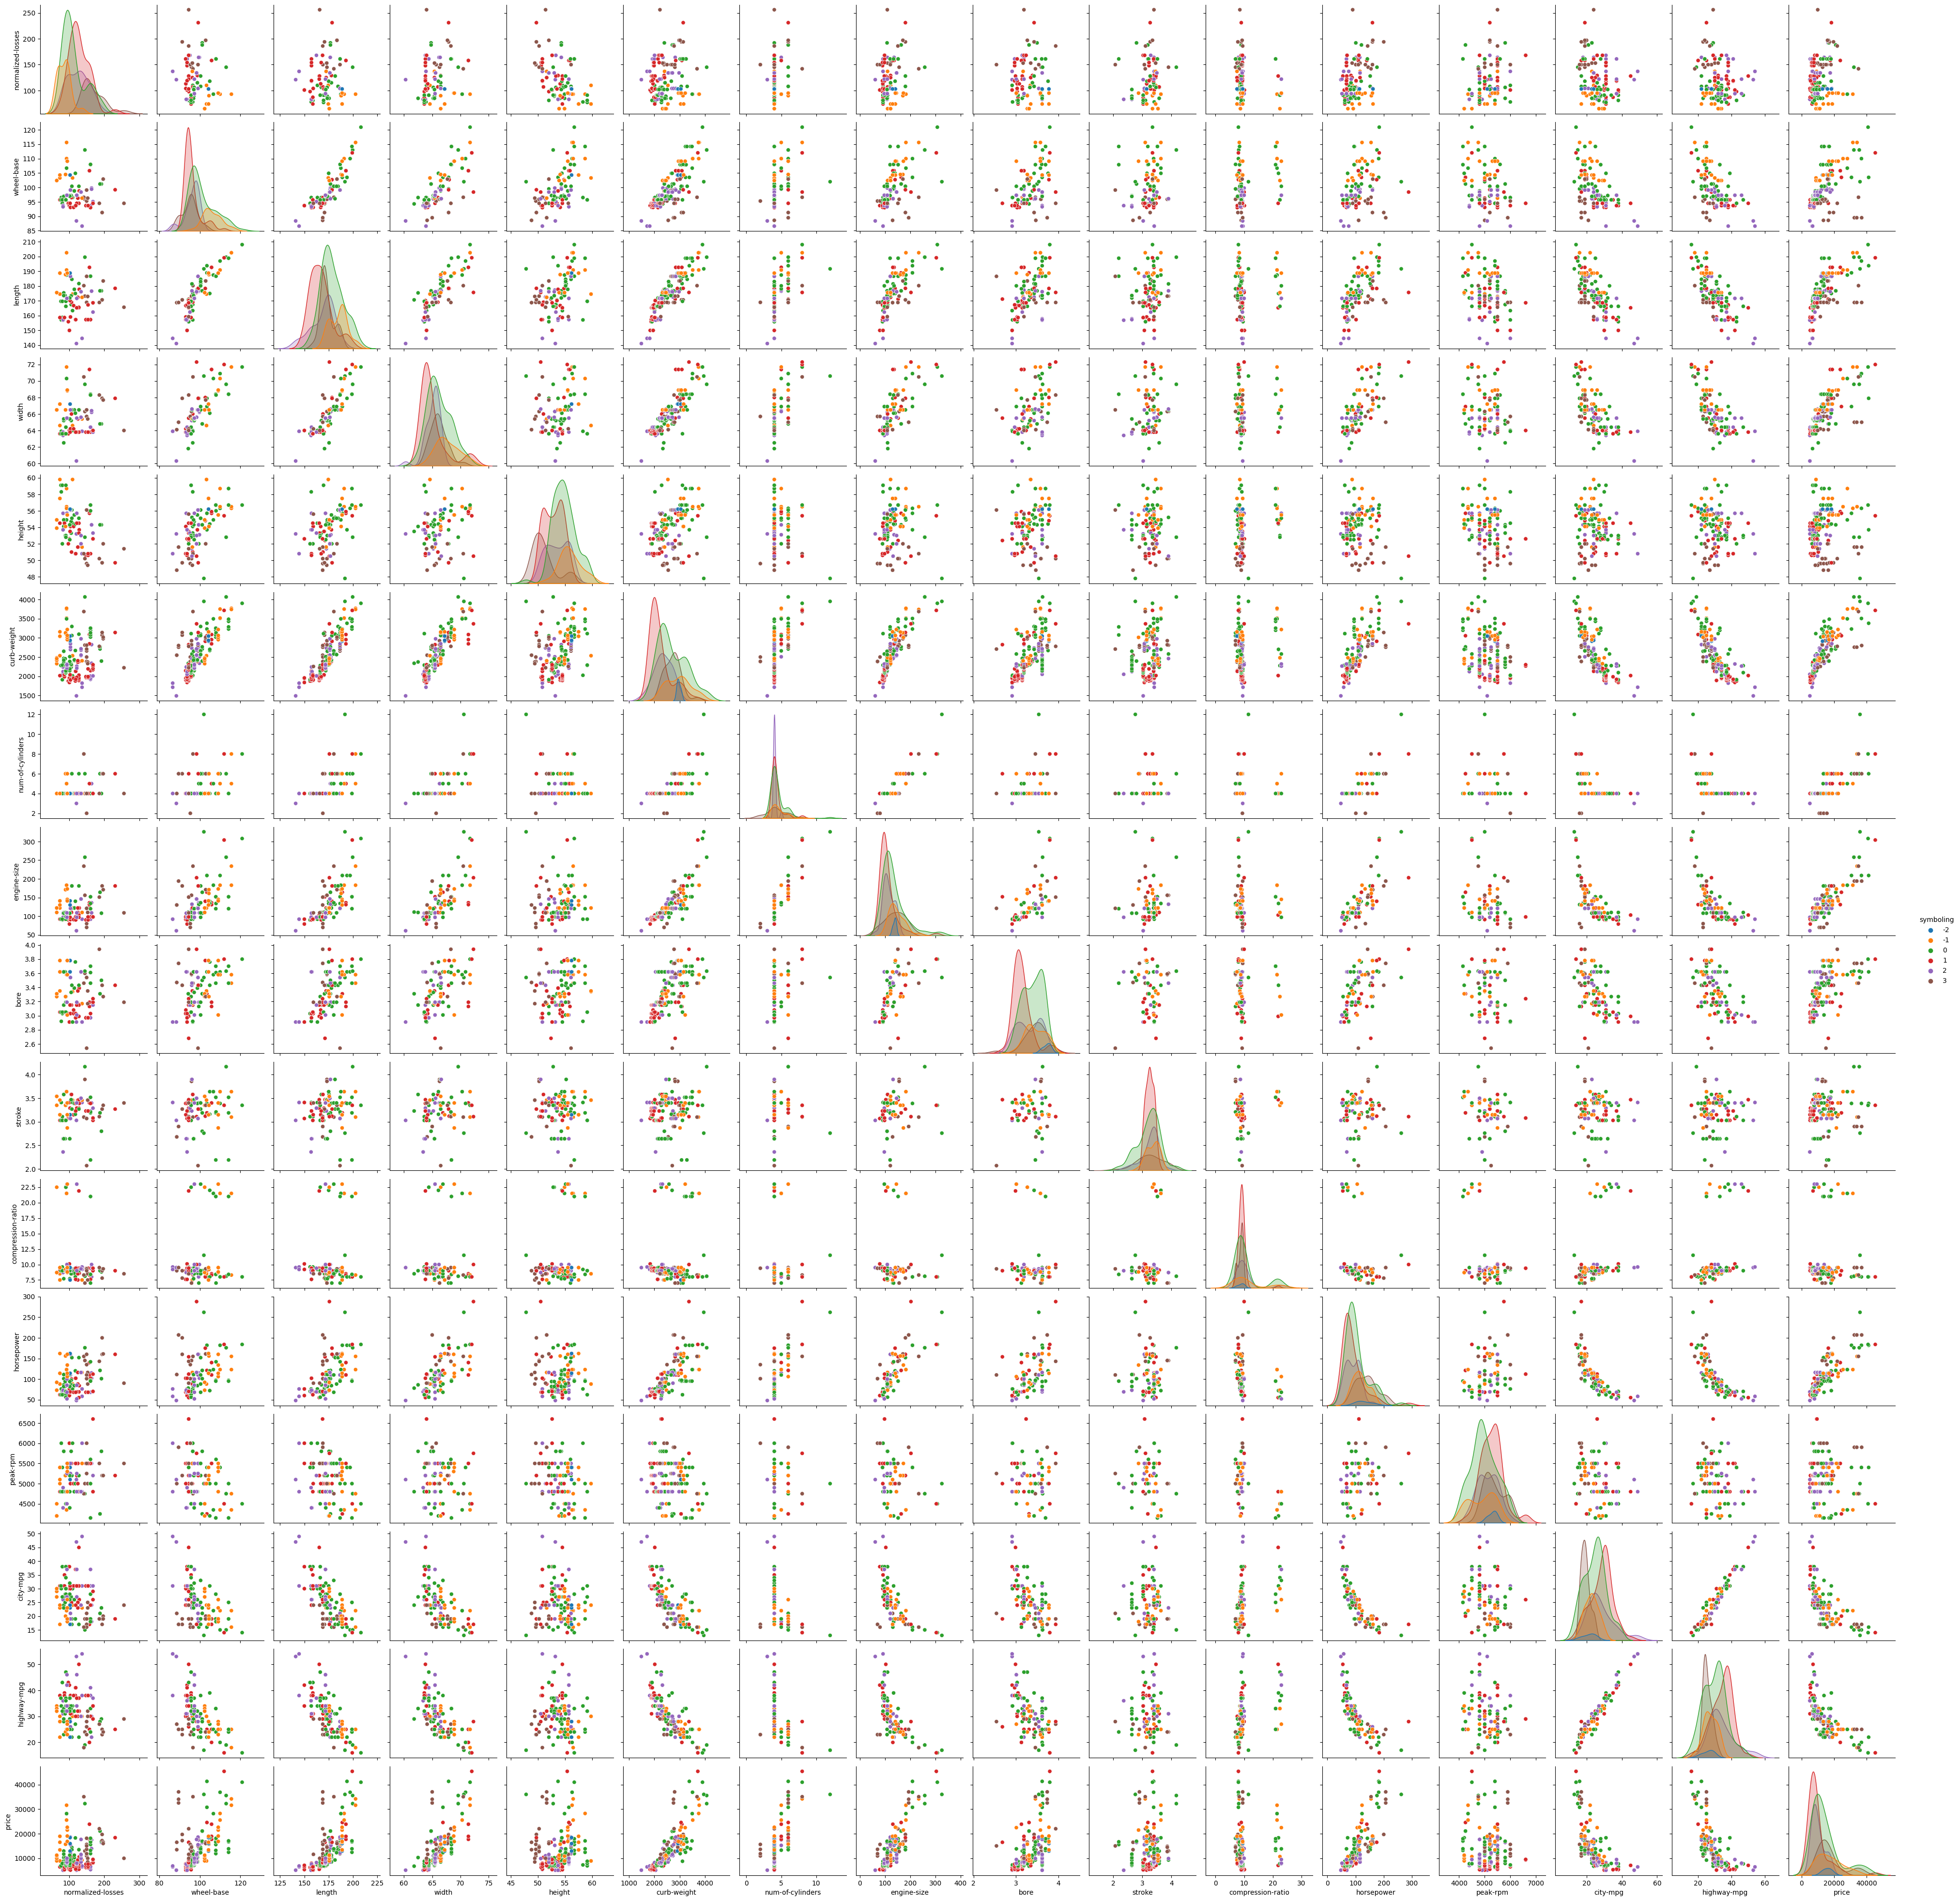

In [75]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Basic correlogram
sns.pairplot(df, hue="symboling")
plt.show()